In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
import os
import glob

In [5]:
path = ""
all_files = glob.glob(os.path.join(path, "part-*"))

dfs = pd.concat((pd.read_csv(f) for f in all_files))

In [8]:
dfs.head()

,adserver_click_url,adserver_imp_pixel,archived,author,author_flair_css_class,author_flair_text,created,created_utc,disable_comments,distinguished,...,selftext,stickied,subreddit,subreddit_id,third_party_tracking,third_party_tracking_2,thumbnail,title,ups,url
0,null,null,True,slicely,null,null,1206868740,1206865140,null,null,...,NaN,False,Switzerland,t5_2qhp6,null,null,default,"Switzerland ""no longer a special case""",0,http://www.swissinfo.ch/eng/front/Switzerland_...
1,null,null,True,slicely,null,null,1206877349,1206873749,null,null,...,NaN,False,Switzerland,t5_2qhp6,null,null,default,Saving the planet,1,http://www.swissinfo.ch/eng/front/Saving_the_p...
2,null,null,True,slicely,null,null,1208163597,1208159997,null,null,...,NaN,False,Switzerland,t5_2qhp6,null,null,default,Small fish wins big prize,0,http://www.swissinfo.ch/eng/front/Small_fish_w...
3,null,null,True,swissinfo,null,null,1208196947,1208193347,null,null,...,NaN,False,Switzerland,t5_2qhp6,null,null,default,Die EU will die Abgaben für Schwerverkehr nach...,1,http://www.swissinfo.ch/ger/startseite/Die_EU_...
4,null,null,True,swissinfo,null,null,1208203041,1208199441,null,null,...,NaN,False,Switzerland,t5_2qhp6,null,null,default,Immer mehr Frauen in Kaderpositionen,1,http://www.swissinfo.ch/ger/startseite/Geschae...


In [12]:
dfs.columns

Index(['adserver_click_url', 'adserver_imp_pixel', 'archived', 'author',
       'author_flair_css_class', 'author_flair_text', 'created', 'created_utc',
       'disable_comments', 'distinguished', 'domain', 'downs', 'edited',
       'from', 'from_id', 'from_kind', 'gilded', 'hide_score', 'href_url',
       'id', 'imp_pixel', 'is_self', 'link_flair_css_class', 'link_flair_text',
       'media', 'media_embed', 'mobile_ad_url', 'name', 'num_comments',
       'over_18', 'permalink', 'post_hint', 'preview', 'promoted',
       'quarantine', 'retrieved_on', 'saved', 'score', 'secure_media',
       'secure_media_embed', 'selftext', 'stickied', 'subreddit',
       'subreddit_id', 'third_party_tracking', 'third_party_tracking_2',
       'thumbnail', 'title', 'ups', 'url'],
      dtype='object')

## Popular Swiss subreddits

In [16]:
df_sr = dfs.groupby(['subreddit'])
df_sr['title'].count()

subreddit
BielBienne             11
CERN                  370
CHTrees                49
EPFL                  106
Fribourg                2
Luzern                 19
SanktGallen            16
Schaffhausen          112
SwissArmyKnives        29
SwissBuyers            25
SwissGaming             3
SwissGuns              46
SwissHistory            1
SwissMountainDogs      41
SwissRap               53
SwissSuperLeague        3
Switzerland          5726
Ticino                  6
UZH                    19
Zermatt                15
Name: title, dtype: int64

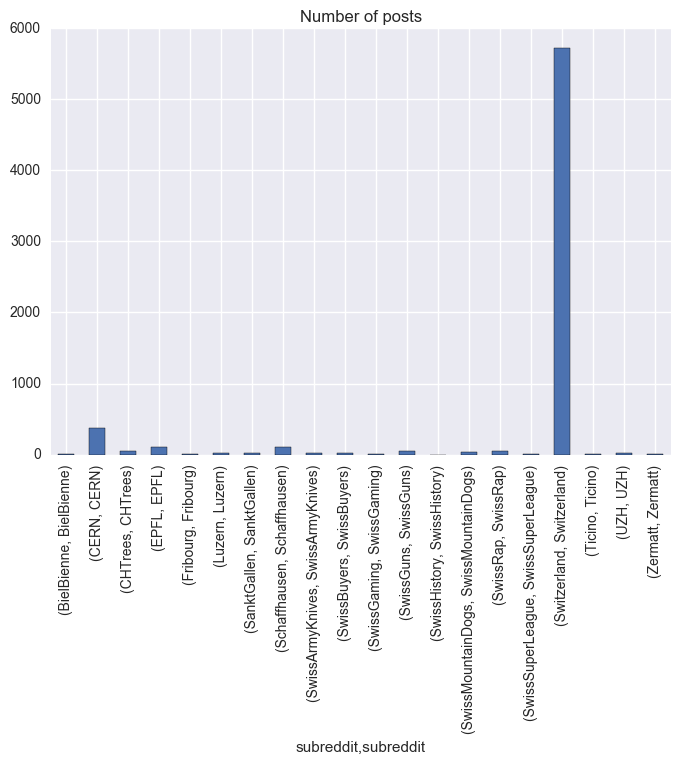

In [17]:
df_sr.subreddit.value_counts().plot(kind='bar', title='Number of posts')

## Swiss subreddits over years

In [18]:
from datetime import datetime

In [19]:
dates = [datetime.fromtimestamp(t) for t in dfs['created_utc'].astype(int)]

In [24]:
dfs['dates'] = dates
dfs.head()

,adserver_click_url,adserver_imp_pixel,archived,author,author_flair_css_class,author_flair_text,created,created_utc,disable_comments,distinguished,...,stickied,subreddit,subreddit_id,third_party_tracking,third_party_tracking_2,thumbnail,title,ups,url,dates
0,null,null,True,slicely,null,null,1206868740,1206865140,null,null,...,False,Switzerland,t5_2qhp6,null,null,default,"Switzerland ""no longer a special case""",0,http://www.swissinfo.ch/eng/front/Switzerland_...,2008-03-30 10:19:00
1,null,null,True,slicely,null,null,1206877349,1206873749,null,null,...,False,Switzerland,t5_2qhp6,null,null,default,Saving the planet,1,http://www.swissinfo.ch/eng/front/Saving_the_p...,2008-03-30 12:42:29
2,null,null,True,slicely,null,null,1208163597,1208159997,null,null,...,False,Switzerland,t5_2qhp6,null,null,default,Small fish wins big prize,0,http://www.swissinfo.ch/eng/front/Small_fish_w...,2008-04-14 09:59:57
3,null,null,True,swissinfo,null,null,1208196947,1208193347,null,null,...,False,Switzerland,t5_2qhp6,null,null,default,Die EU will die Abgaben für Schwerverkehr nach...,1,http://www.swissinfo.ch/ger/startseite/Die_EU_...,2008-04-14 19:15:47
4,null,null,True,swissinfo,null,null,1208203041,1208199441,null,null,...,False,Switzerland,t5_2qhp6,null,null,default,Immer mehr Frauen in Kaderpositionen,1,http://www.swissinfo.ch/ger/startseite/Geschae...,2008-04-14 20:57:21


## Language analysis

In [38]:
from langdetect import detect

In [65]:
dfs = dfs[dfs['body'] != '?']

In [ ]:
lang = [detect(dfs['body'].iloc[i]) for i in range(len(dfs)) if len(dfs['body'].iloc[i])>1]

## Popular and controversial comments

In [21]:
df_popular = dfs.sort_values(by='score', axis=0, ascending=False)
df_popular = df_popular

<Container object of 6652 artists>

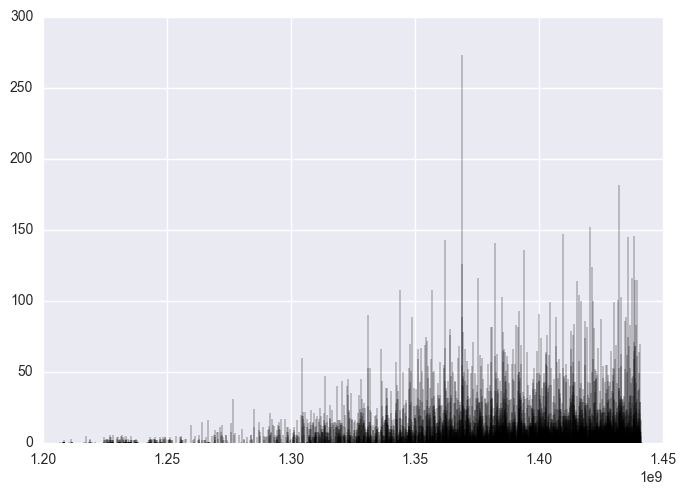

In [22]:
plt.bar(df_popular['created_utc'], df_popular['score'])